# QCTO - Workplace Module

### Chennai Housing Sales Price Prediction
#### Done By: Nelisiwe Bezana

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

### Project Overview:
This project focuses on analyzing real estate data from the city of Chennai. The primary goal is to explore and understand the various factors influencing property prices and to develop predictive models that can accurately estimate property values based on these factors.

### Problem Domain:
In rapidly urbanizing cities like Chennai, understanding the dynamics of the real estate market is crucial for both buyers and sellers. Property prices are influenced by a multitude of factors, including location, size, number of rooms, proximity to amenities, and the overall quality of the property. Accurately predicting property prices can assist potential buyers in making informed decisions, while also aiding sellers in setting competitive prices.

### Goals and Objectives:

- To clean and preprocess the real estate dataset for accurate analysis.
- To explore and analyze the key factors affecting property prices in Chennai.
- To build and validate predictive models that can estimate property values based on these factors.
- To provide insights that could help stakeholders in the real estate market make data-driven decisions.

### Significance of the Project:
The outcomes of this project have practical implications for the real estate market in Chennai. Accurate property price predictions can lead to better market efficiency, reduced uncertainty in transactions, and more informed decision-making for all parties involved. Additionally, this project can serve as a case study for similar analyses in other urban centers, contributing to the broader field of real estate analytics.

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

**Details:** The dataset used for this project was obtained from Kaggle, a popular platform for data science and machine learning resources. The data consists of real estate transactions in Chennai, India, and is intended for use in predicting housing sale prices.

### Overview of the Dataset:

- **Source:** The dataset is sourced from Kaggle, ensuring a reliable and well-documented collection.
- **Size:** The dataset contains approximately 7,109 records and 22 fields, providing a comprehensive view of various attributes associated with housing sales.
- **Scope:** The dataset covers properties located in different areas of Chennai, allowing for a diverse analysis of housing prices across the city.

### Types of Data:
**Numerical:** Attributes such as internal square footage (`INT_SQFT`), number of bedrooms (`N_BEDROOM`), number of bathrooms (`N_BATHROOM`), and sales price (`SALES_PRICE`).
**Categorical:** Attributes like area (AREA), building type (`BUILDTYPE`), and sale condition (`SALE_COND`).

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

In this step, we load the dataset into a pandas DataFrame and display the first few rows to understand its structure. The data consists of housing prices and various features such as the area, number of rooms, sale conditions, and more.

In [2]:
data = pd.read_csv('housing_price_data.csv')
print(data.head())

   PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0

### Getting Information about the features :

After loading the data, we use the info() method to get a summary of the dataset, including the number of entries, the data types of each column, and the number of non-null values. This step is essential for identifying any missing or problematic data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

### Handling null values

To identify columns with missing values, we use isnull().sum() to display the number of missing values in each column.

In [4]:
# Checking for missing values in the dataset
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64


Next, we drop rows with missing values using dropna(), as the missing values in this dataset are relatively few, and removing them will ensure that we don't introduce bias or errors into the analysis.

In [5]:
# Handling missing values
data = data.dropna()
data.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

### Reorganizing the data

In [6]:
#drop some unnecessary attributes, just for optimization purposes.

data = data.drop('PRT_ID',axis=1)
data = data.drop('MZZONE',axis=1)

In [7]:
#Check if the features's names are clear and easy to understand, and rename where needed.

data = data.rename(columns={'INT_SQFT':'PROP_SIZE'})

In [8]:
#Fixing data formats ,espacially Date attributes needs to be in the correct format.

data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'], format='%d-%m-%Y', errors='coerce')
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'], format='%d-%m-%Y', errors='coerce')
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)
data['N_BEDROOM'] = data['N_BEDROOM'].astype(int)
data['N_BATHROOM'] = data['N_BATHROOM'].astype(int)

In [9]:
#represent the Commission feature a percentage instead of number, to give it more context.

data['COMMIS_PERC'] = ((data['COMMIS']/data['SALES_PRICE'])*100).round(2)
data = data.drop('COMMIS',axis=1)

In [10]:
# view table

data.head()

AREA  PROP_SIZE  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  \
0  Karapakkam       1004 2011-05-04            131          1           1   
1  Anna Nagar       1986 2006-12-19             26          2           1   
2       Adyar        909 2012-02-04             70          1           1   
3   Velachery       1855 2010-03-13             14          3           2   
4  Karapakkam       1226 2009-10-05             84          1           1   

   N_ROOM SALE_COND PARK_FACIL DATE_BUILD   BUILDTYPE UTILITY_AVAIL  STREET  \
0       3  AbNormal        Yes 1967-05-15  Commercial        AllPub   Paved   
1       5  AbNormal         No 1995-12-22  Commercial        AllPub  Gravel   
2       3  AbNormal        Yes 1992-02-09  Commercial           ELO  Gravel   
3       5    Family         No 1988-03-18      Others       NoSewr    Paved   
4       3  AbNormal        Yes 1979-10-13      Others        AllPub  Gravel   

   QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  SALES_PRICE  \
0       4.0          3.9         4.9       4.330   380000      7600000   
1       4.9          4.2         2.5       3.765   760122     21717770   
2       4.1          3.8         2.2       3.090   421094     13159200   
3       4.7          3.9         3.6       4.010   356321      9630290   
4       3.0          2.5         4.1       3.290   237000      7406250   

   COMMIS_PERC  
0          1.9  
1          1.4  
2          0.7  
3          0.8  
4          1.0

Now lets's get a closer look to the data. First let's check for the range of values of each feature.

In [11]:
# checking for the unique values of the categorical features 

for column in data.columns:
  if(data[column].dtype == object ):    
    print('Feature name : ',column)
    print('the Number of unique values: ', len(data[column].unique()))
    print('Values:',data[column].unique())
    print(' ')

Feature name :  AREA
the Number of unique values:  17
Values: ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar']
 
Feature name :  SALE_COND
the Number of unique values:  9
Values: ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl']
 
Feature name :  PARK_FACIL
the Number of unique values:  3
Values: ['Yes' 'No' 'Noo']
 
Feature name :  BUILDTYPE
the Number of unique values:  5
Values: ['Commercial' 'Others' 'Other' 'House' 'Comercial']
 
Feature name :  UTILITY_AVAIL
the Number of unique values:  5
Values: ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub']
 
Feature name :  STREET
the Number of unique values:  5
Values: ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess']
 


From the output above we can see that ,there are couple of issues in the data entry .Some of the features have misspelling issue .let's fixe it.

In [12]:
# fixing the Error

# Correct values in 'PARK_FACIL' column
data.loc[data['PARK_FACIL'] == 'Noo', 'PARK_FACIL'] = 'No'

# Correct values in 'AREA' column
data.loc[data['AREA'] == 'Velchery', 'AREA'] = 'Velachery'
data.loc[data['AREA'] == 'KKNagar', 'AREA'] = 'KK Nagar'
data.loc[data['AREA'] == 'TNagar', 'AREA'] = 'T Nagar'
data.loc[data['AREA'] == 'Ann Nagar', 'AREA'] = 'Ana Nagar'
data.loc[data['AREA'] == 'Anna Nagar', 'AREA'] = 'Ana Nagar'
data.loc[data['AREA'] == 'Chormpet', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Chormpt', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Chrmpet', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Chrompt', 'AREA'] = 'Chrompet'
data.loc[data['AREA'] == 'Adyr', 'AREA'] = 'Adyar'
data.loc[data['AREA'] == 'Karapakkam', 'AREA'] = 'Karapakam'

# Correct values in 'SALE_COND' column
data.loc[data['SALE_COND'] == 'Normal Sale', 'SALE_COND'] = 'Normal'
data.loc[data['SALE_COND'] == 'AbNormal', 'SALE_COND'] = 'Normal'
data.loc[data['SALE_COND'] == 'Ab Normal', 'SALE_COND'] = 'Normal'
data.loc[data['SALE_COND'] == 'Partial', 'SALE_COND'] = 'Partial'
data.loc[data['SALE_COND'] == 'Partiall', 'SALE_COND'] = 'Partial'
data.loc[data['SALE_COND'] == 'PartiaLl', 'SALE_COND'] = 'Partial'
data.loc[data['SALE_COND'] == 'AdjLand', 'SALE_COND'] = 'Adj Land'

# Correct values in 'BUILDTYPE' column
data.loc[data['BUILDTYPE'] == 'Others', 'BUILDTYPE'] = 'Other'
data.loc[data['BUILDTYPE'] == 'Comercial', 'BUILDTYPE'] = 'Commercial'

# Correct values in 'UTILITY_AVAIL' column
data.loc[data['UTILITY_AVAIL'] == 'NoSeWa', 'UTILITY_AVAIL'] = 'No Sewr'
data.loc[data['UTILITY_AVAIL'] == 'NoSewr ', 'UTILITY_AVAIL'] = 'No Sewr'
data.loc[data['UTILITY_AVAIL'] == 'AllPub', 'UTILITY_AVAIL'] = 'All Pub'

# Correct values in 'STREET' column
data.loc[data['STREET'] == 'Pavd', 'STREET'] = 'Paved'
data.loc[data['STREET'] == 'NoAccess', 'STREET'] = 'No Access'

In [13]:
for column in data.columns:
  if(data[column].dtype == object ):    
    print('Feature name : ',column)
    print('the Number of unique values: ', len(data[column].unique()))
    print('Values:',data[column].unique())
    print(' ')

Feature name :  AREA
the Number of unique values:  7
Values: ['Karapakam' 'Ana Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']
 
Feature name :  SALE_COND
the Number of unique values:  4
Values: ['Normal' 'Family' 'Partial' 'Adj Land']
 
Feature name :  PARK_FACIL
the Number of unique values:  2
Values: ['Yes' 'No']
 
Feature name :  BUILDTYPE
the Number of unique values:  3
Values: ['Commercial' 'Other' 'House']
 
Feature name :  UTILITY_AVAIL
the Number of unique values:  3
Values: ['All Pub' 'ELO' 'No Sewr']
 
Feature name :  STREET
the Number of unique values:  3
Values: ['Paved' 'Gravel' 'No Access']
 


Note : this issue only happened with the categorical data .Numeric data seems to be good.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7056 non-null   object        
 1   PROP_SIZE      7056 non-null   int64         
 2   DATE_SALE      7056 non-null   datetime64[ns]
 3   DIST_MAINROAD  7056 non-null   int64         
 4   N_BEDROOM      7056 non-null   int32         
 5   N_BATHROOM     7056 non-null   int32         
 6   N_ROOM         7056 non-null   int64         
 7   SALE_COND      7056 non-null   object        
 8   PARK_FACIL     7056 non-null   object        
 9   DATE_BUILD     7056 non-null   datetime64[ns]
 10  BUILDTYPE      7056 non-null   object        
 11  UTILITY_AVAIL  7056 non-null   object        
 12  STREET         7056 non-null   object        
 13  QS_ROOMS       7056 non-null   float64       
 14  QS_BATHROOM    7056 non-null   float64       
 15  QS_BEDROOM     7056 non-nu

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


### Statistical Data Analysis

#### Summary of the data:

let's get a discriptive statistic of the data.

In [15]:
# Display basic statistical information

data.describe()

PROP_SIZE                      DATE_SALE  DIST_MAINROAD    N_BEDROOM  \
count  7056.000000                           7056    7056.000000  7056.000000   
mean   1381.316752  2010-04-05 21:48:22.040816384      99.569161     1.636621   
min     500.000000            2004-01-16 00:00:00       0.000000     1.000000   
25%     991.000000            2008-10-16 00:00:00      50.000000     1.000000   
50%    1369.500000            2010-05-02 12:00:00      99.000000     1.000000   
75%    1744.000000            2011-09-15 00:00:00     148.000000     2.000000   
max    2500.000000            2015-02-17 00:00:00     200.000000     4.000000   
std     457.860850                            NaN      57.403870     0.803633   

        N_BATHROOM       N_ROOM                     DATE_BUILD     QS_ROOMS  \
count  7056.000000  7056.000000                           7056  7056.000000   
mean      1.213152     3.686650  1985-12-27 09:09:11.020408192     3.517177   
min       1.000000     2.000000            1949-10-28 00:00:00     2.000000   
25%       1.000000     3.000000            1976-08-15 00:00:00     2.700000   
50%       1.000000     4.000000            1986-09-30 00:00:00     3.500000   
75%       1.000000     4.000000            1996-06-29 00:00:00     4.300000   
max       2.000000     6.000000            2010-11-12 00:00:00     5.000000   
std       0.409563     1.020011                            NaN     0.892141   

       QS_BATHROOM   QS_BEDROOM   QS_OVERALL        REG_FEE   SALES_PRICE  \
count  7056.000000  7056.000000  7056.000000    7056.000000  7.056000e+03   
mean      3.505896     3.485332     3.503389  376791.852608  1.088801e+07   
min       2.000000     2.000000     2.000000   71177.000000  2.156875e+06   
25%       2.700000     2.700000     3.130000  272117.500000  8.266790e+06   
50%       3.500000     3.500000     3.500000  349444.500000  1.031922e+07   
75%       4.300000     4.300000     3.890000  451030.500000  1.298148e+07   
max       5.000000     5.000000     4.970000  983922.000000  2.366734e+07   
std       0.897644     0.886814     0.527313  143109.581793  3.769081e+06   

       COMMIS_PERC  
count  7056.000000  
mean      1.298838  
min       0.100000  
25%       0.900000  
50%       1.300000  
75%       1.700000  
max       2.500000  
std       0.556733

#### Sales price distribution

The distribution of the SALES_PRICE in the dataset is shown in the histogram below.

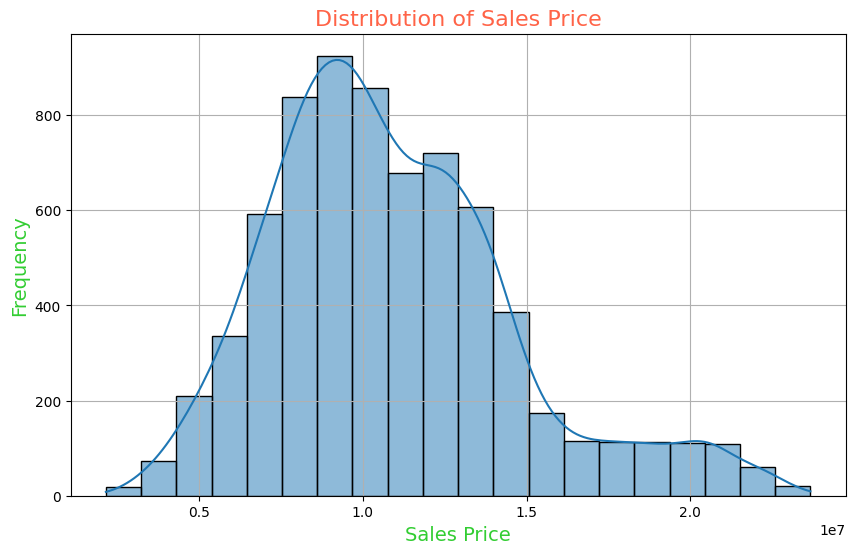

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of SALES_PRICE in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data['SALES_PRICE'].dropna(), bins=20, kde=True)
plt.title('Distribution of Sales Price', fontsize=16, color='#FF6347')
plt.xlabel('Sales Price', fontsize=14, color='#32CD32')
plt.ylabel('Frequency', fontsize=14, color='#32CD32')
plt.grid(True)
plt.show()


#### Correlation test:
We examine the relationships between numeric features in the dataset. The following correlation matrix shows the relationships between various features:.

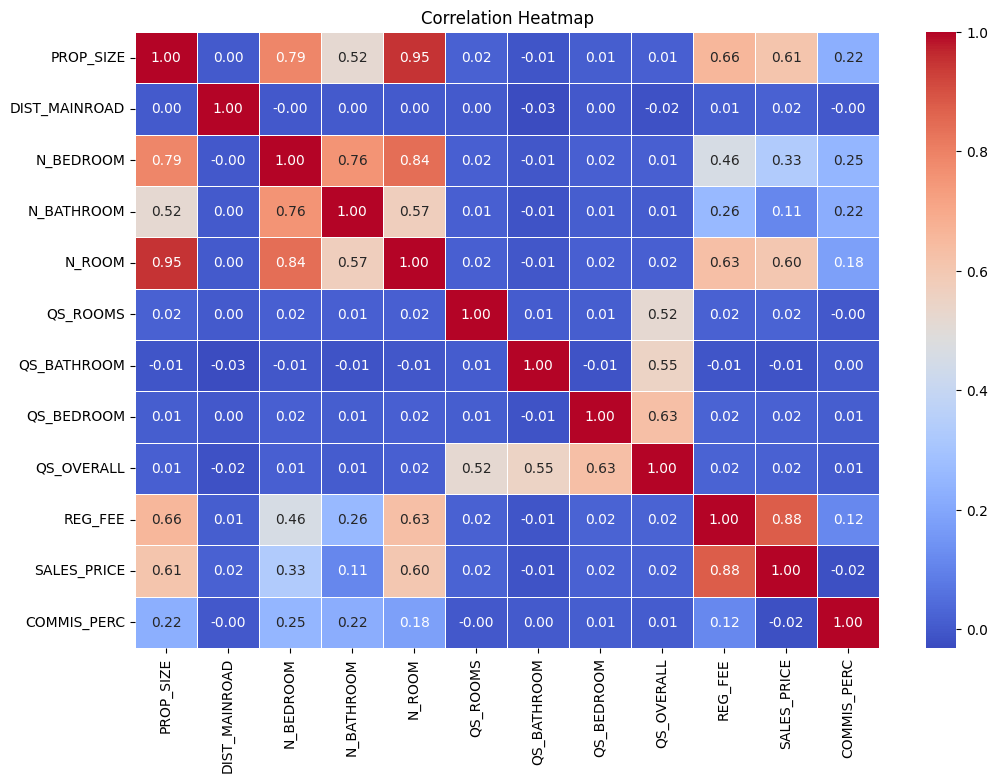

In [17]:
# checking for correlation among the numeric Features

correlation_matrix = data[['PROP_SIZE','DIST_MAINROAD','N_BEDROOM','N_BATHROOM',
                    'N_ROOM','QS_ROOMS','QS_BATHROOM','QS_BEDROOM','QS_OVERALL',
                    'REG_FEE','SALES_PRICE','COMMIS_PERC']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- PROP_SIZE has strong correlation with (N_ROOM,N_BEDROOM,N_BATHROOM , REG_FEE,SALES_PRICE) which does make sense
all QS are linked to each other

- REG_REE and SALES_PRICE has a very strong correlation
  
- but in the other hand we can see that DIST_MAINROAD has no correlation with any of the features.

### Exploring the data and features

#### First let's see the count of each type of the AREA feature.

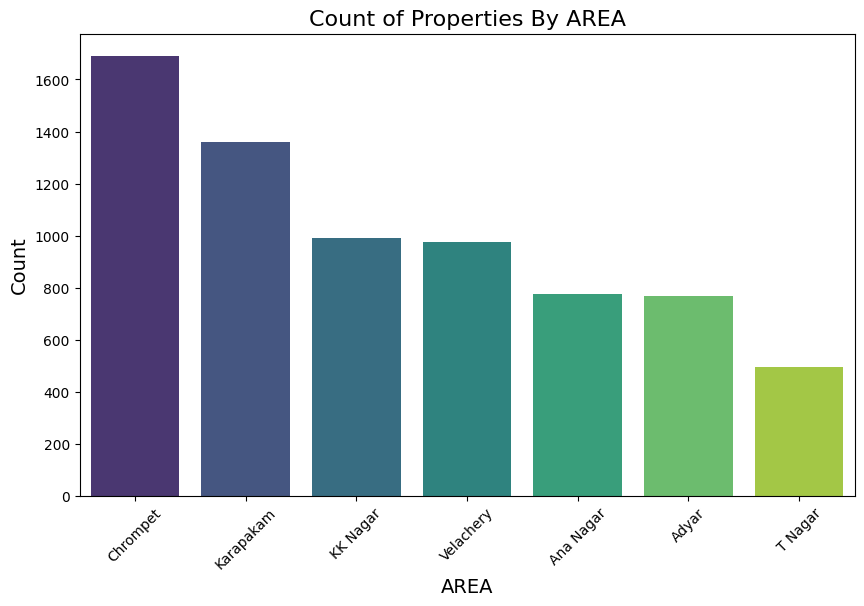

In [18]:
# Grouping by 'AREA' and counting occurrences
area_data = data.groupby('AREA').size().sort_values(ascending=False)

# Plotting the bar chart using 'hue' for color and setting legend=False
plt.figure(figsize=(10, 6))
sns.barplot(x=area_data.index, y=area_data.values, hue=area_data.index, palette='viridis', dodge=False, legend=False)

# Adding labels and title
plt.title('Count of Properties By AREA', fontsize=16)
plt.xlabel('AREA', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability

plt.show()


#### Mean Properties size by Area

Next, we examine the mean property size for each area.

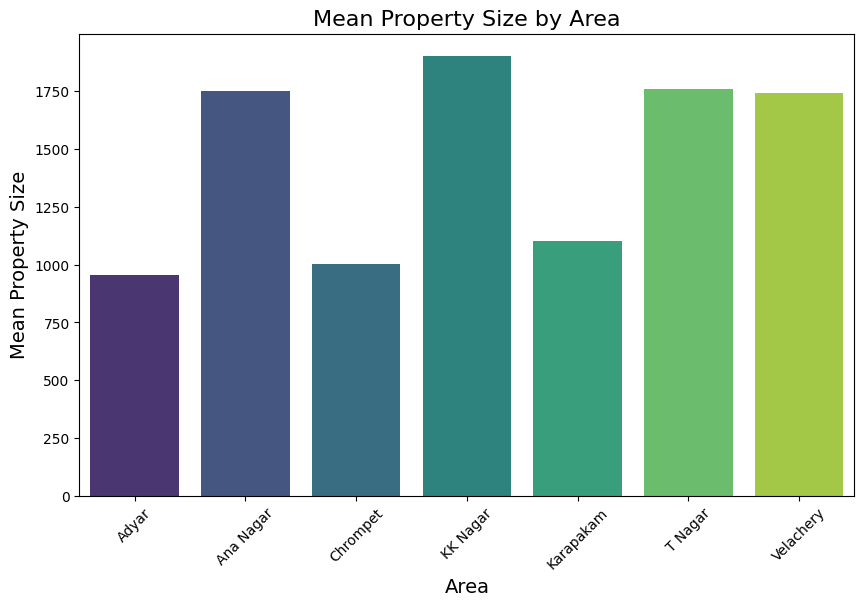

In [19]:
# Calculate the mean property size by area
prop_mean_size = data.groupby('AREA')['PROP_SIZE'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AREA', y='PROP_SIZE', data=prop_mean_size, hue='AREA', palette='viridis')

# Adding labels and title
plt.title('Mean Property Size by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Mean Property Size', fontsize=14)
plt.xticks(rotation=45)

plt.show()

#### Average sales price per area

Let's look at the average sales price across different areas.

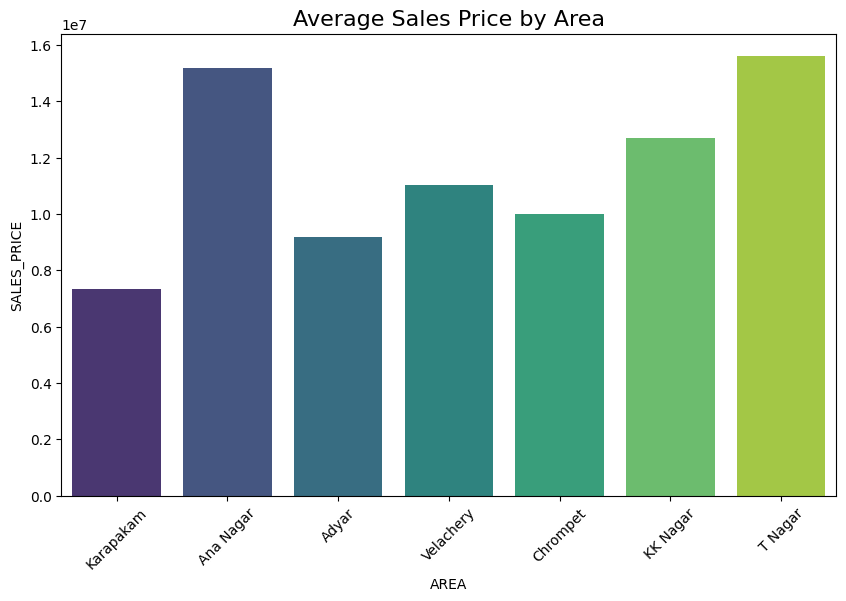

In [20]:
# Define a custom color palette with enough colors for all areas
palette = sns.color_palette("viridis", n_colors=len(data['AREA'].unique()))

# Bar plot to visualize the average sales price across different areas
plt.figure(figsize=(10, 6))
sns.barplot(x='AREA', y='SALES_PRICE', data=data, estimator=lambda x: sum(x) / len(x), errorbar=None, hue='AREA', palette=palette, dodge=False, legend=False)

#plot adjustments
plt.xticks(rotation=45)
plt.title("Average Sales Price by Area", fontsize=16)
plt.show()


#### SALES_PRICE Over Time by Area

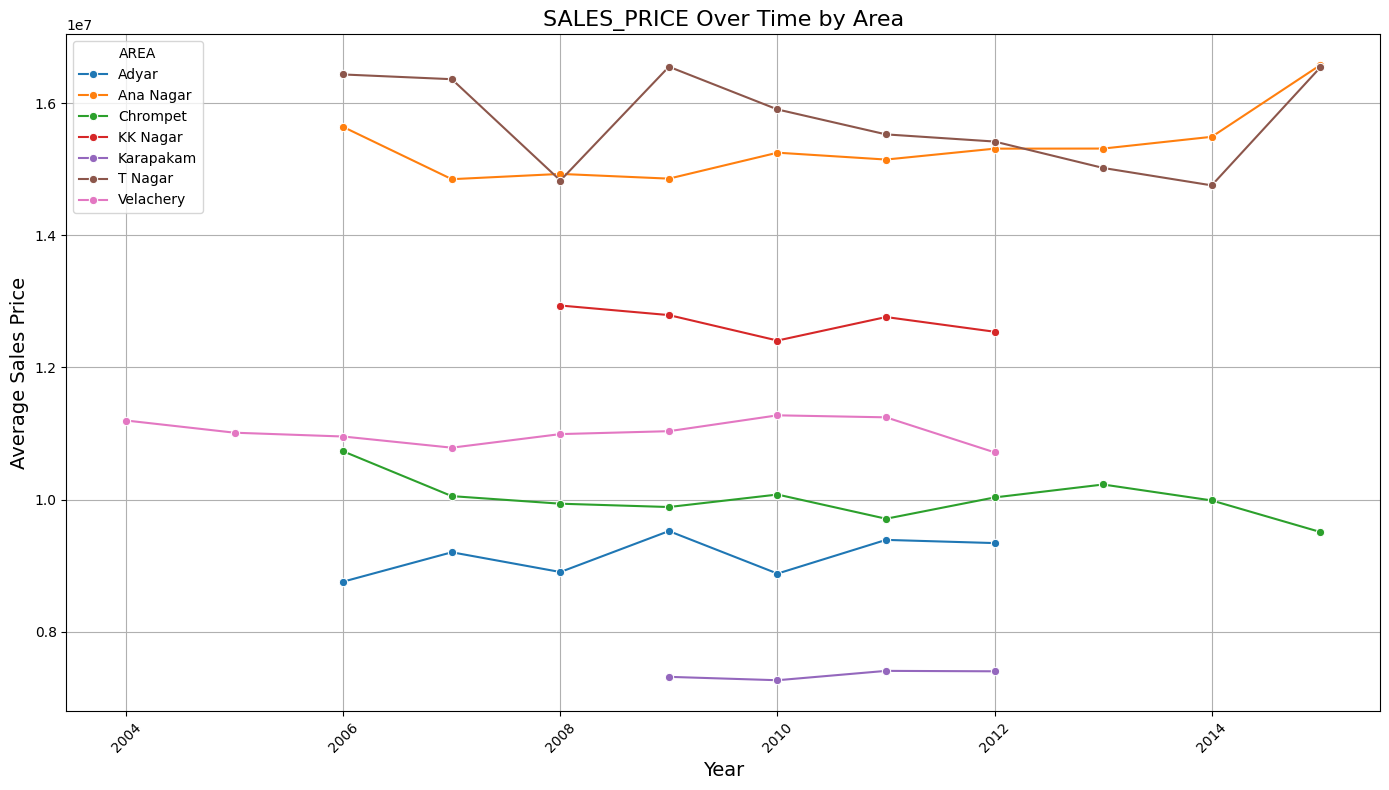

In [21]:
# Ensure DATE_SALE is in datetime format
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

# Creating a new column for the year of sale
data['YEAR_SALE'] = data['DATE_SALE'].dt.year

# Grouping by AREA and YEAR_SALE to calculate the average sales price
prop_count = data.groupby(['AREA', 'YEAR_SALE'])['SALES_PRICE'].mean().reset_index()

# Set the figure size
plt.figure(figsize=(14, 8))

# Creating the line plot using Seaborn
sns.lineplot(data=prop_count, x='YEAR_SALE', y='SALES_PRICE', hue='AREA', marker='o')

# Adding labels and title
plt.title('SALES_PRICE Over Time by Area', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Sales Price', fontsize=14)
plt.xticks(rotation=45)

plt.grid()

# Display the plot
plt.tight_layout()
plt.show()

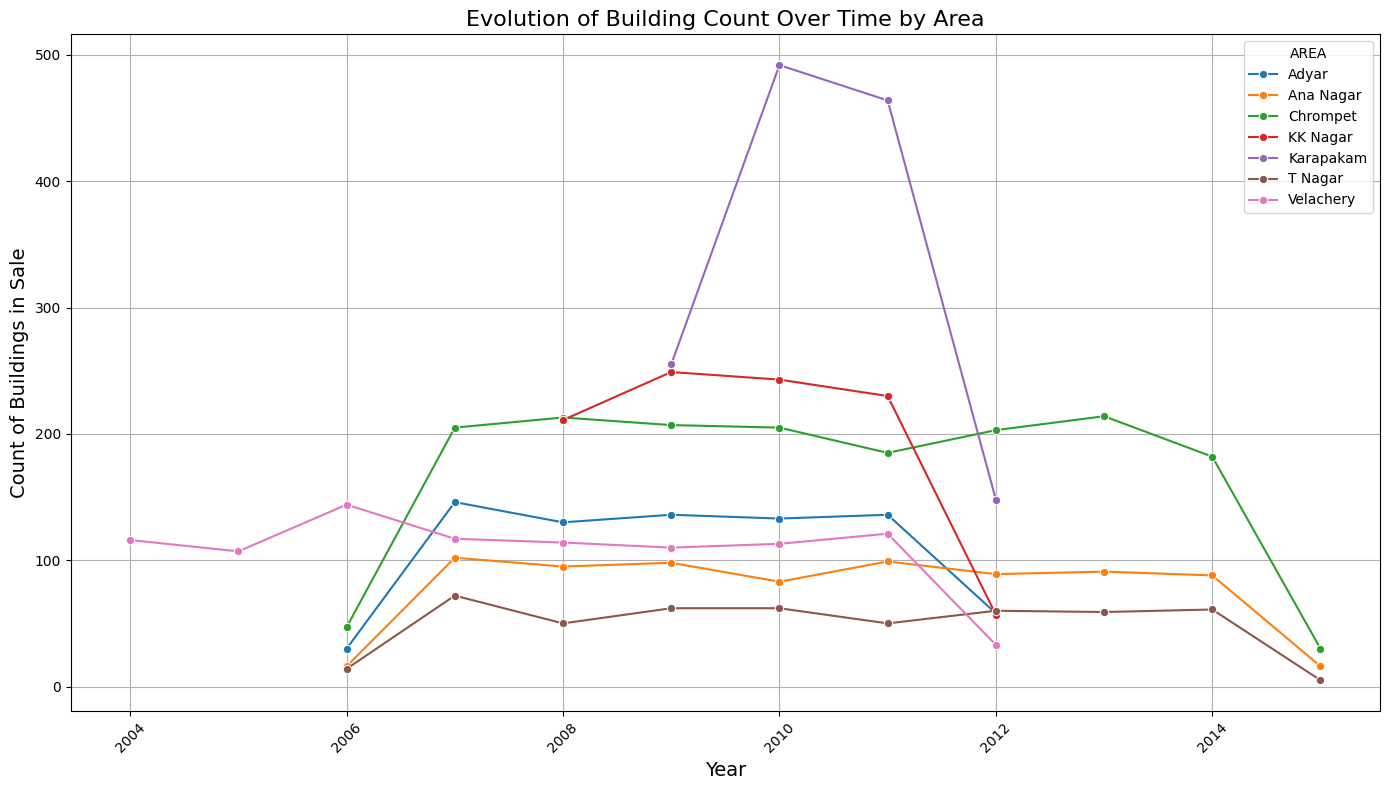

In [22]:
# Ensure DATE_SALE is in datetime format
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'])

# Creating a new column for the year of sale
data['YEAR_SALE'] = data['DATE_SALE'].dt.year

# Grouping by AREA and YEAR_SALE to count the number of sales
prop_count = data.groupby(['AREA', 'YEAR_SALE']).size().reset_index(name='count')

# Set the figure size
plt.figure(figsize=(14, 8))

# Creating the line plot using Seaborn
sns.lineplot(data=prop_count, x='YEAR_SALE', y='count', hue='AREA', marker='o')

# Adding labels and title
plt.title('Evolution of Building Count Over Time by Area', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count of Buildings in Sale', fontsize=14)
plt.xticks(rotation=45)
plt.grid()

plt.tight_layout()
plt.show()

The data shows that the sales rate starts from 2004-2015 ,we can see that most of the AREAs had a steady sales rate all over this period ,except for karapakam AREA which suffered from a very significant sales rate in 2010 till 2012 ,it could be linked to economic issues

### Analysis

- PROP_SIZE has strong correlation with (N_ROOM,N_BEDROOM,N_BATHROOM , REG_FEE,SALES_PRICE) which does make sense
- All QS attributes are linked to each other.
- REG_REE and SALES_PRICE has a very strong correlation.
- DIST_MAINROAD has no correlation with any of the features.
- There is a clear relationship between SALES_PRICE & REG_FEE.
- sales rate starts from 2004-2015 ,AREAs had a steady sales rate all over this period ,except for karapakam AREA which suffered from a very
- significant sales rate in 2010 till 2012 ,it could be linked to economic issues.

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---



Feature Engineering: We will first extract useful features from the DATE_SALE and DATE_BUILD columns (the year of sale and the year of construction). These will be used to capture temporal trends in property prices.

Model Selection: We will train three different models: Linear Regression, Random Forest, and Gradient Boosting. Each model will be trained using the features extracted from the dataset, and we'll evaluate their performance later.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Step 1: Feature Engineering
data['SALE_YEAR'] = data['DATE_SALE'].dt.year  # Extract year from 'DATE_SALE'
data['BUILD_YEAR'] = data['DATE_BUILD'].dt.year  # Extract year from 'DATE_BUILD'

# Drop the original datetime columns
data = data.drop(columns=['DATE_SALE', 'DATE_BUILD'])

# Step 2: One-Hot Encoding for categorical variables
X = pd.get_dummies(data.drop(columns=['SALES_PRICE']), drop_first=True)
y = data['SALES_PRICE']

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scaling the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Initialize the models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)

# Step 6: Train the models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

# Print model training completion
print("Model training completed!")

Model training completed!


### Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Step 1: Define the parameter grids for Random Forest and Gradient Boosting
rf_param_grid = {
    'n_estimators': [50, 100], 
    'max_depth': [10, 20, None], 
    'min_samples_split': [2, 5]
}

gb_param_grid = {
    'n_estimators': [50, 100], 
    'learning_rate': [0.1, 0.2],
    'max_depth': [3, 5]
}

# Step 2: Use GridSearchCV to find the best parameters for each model

# Random Forest Tuning
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)

# Gradient Boosting Tuning
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=3, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)

# Step 3: Print the best parameters for each model
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)

# Step 4: Re-train the models with the best parameters found
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_


Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

Evaluation Metrics: We'll use the R² score to measure how well the models perform in terms of explained variance. Additionally, we will calculate the Mean Squared Error (MSE) for further validation.

Validation Technique: We use a train/test split to assess the models, but cross-validation could be an alternative for more robust validation.

Tuned Random Forest R²: 0.9581785326756139
Tuned Random Forest MSE: 620275196825.4064
Tuned Gradient Boosting R²: 0.9674434354870912
Tuned Gradient Boosting MSE: 482862767692.2378
Linear Regression R²: 0.9468215277399057
Linear Regression MSE: 788716643826.8588
Random Forest R²: 0.9583666464025543
Random Forest MSE: 617485187615.5797
Gradient Boosting R²: 0.9530523230024064
Gradient Boosting MSE: 696304588366.2202


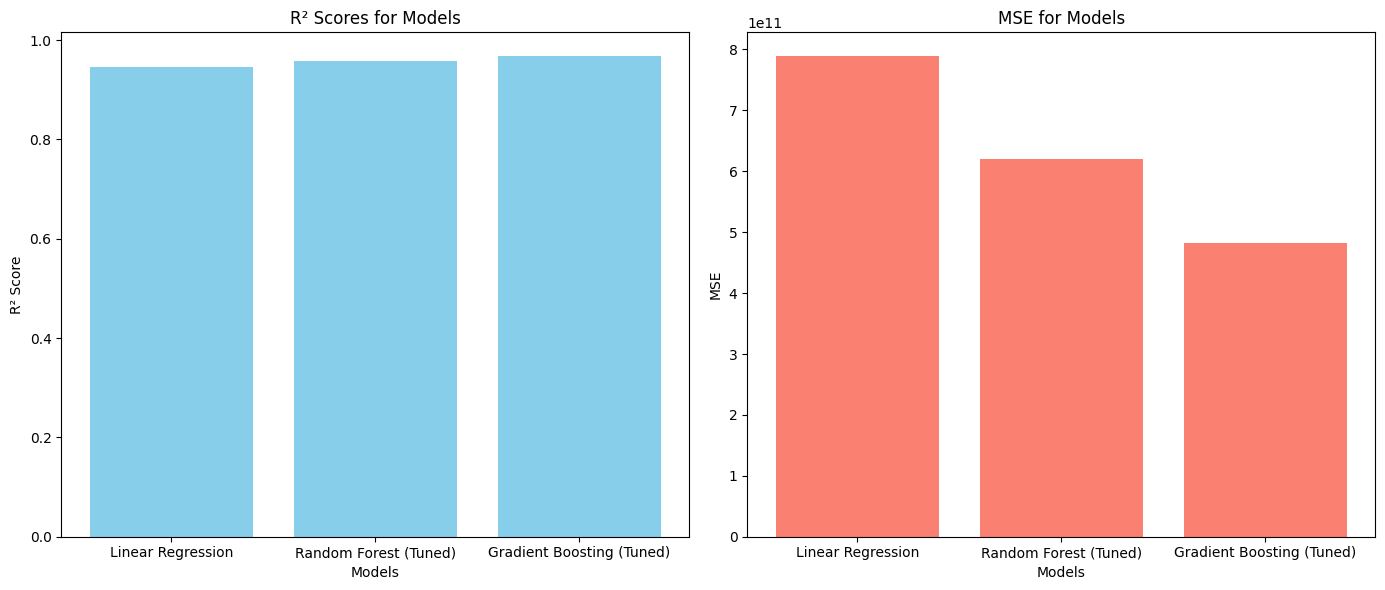

In [25]:
# Step 5: Evaluate the tuned models
rf_predictions_tuned = best_rf_model.predict(X_test)
gb_predictions_tuned = best_gb_model.predict(X_test)

# Step 6: Calculate R² and MSE for each tuned model
rf_r2_tuned = r2_score(y_test, rf_predictions_tuned)
gb_r2_tuned = r2_score(y_test, gb_predictions_tuned)

rf_mse_tuned = mean_squared_error(y_test, rf_predictions_tuned)
gb_mse_tuned = mean_squared_error(y_test, gb_predictions_tuned)

# Step 7: Print the evaluation results for the tuned models
print("Tuned Random Forest R²:", rf_r2_tuned)
print("Tuned Random Forest MSE:", rf_mse_tuned)

print("Tuned Gradient Boosting R²:", gb_r2_tuned)
print("Tuned Gradient Boosting MSE:", gb_mse_tuned)

# Step 8: Evaluate the base models on the test set (before tuning)
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Step 9: Calculate R² and MSE for each base model
lr_r2 = r2_score(y_test, lr_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)

# Step 10: Print out the evaluation results for base models
print("Linear Regression R²:", lr_r2)
print("Linear Regression MSE:", lr_mse)

print("Random Forest R²:", rf_r2)
print("Random Forest MSE:", rf_mse)

print("Gradient Boosting R²:", gb_r2)
print("Gradient Boosting MSE:", gb_mse)

# Step 11: Create a bar plot for R² and MSE
models = ['Linear Regression', 'Random Forest (Tuned)', 'Gradient Boosting (Tuned)']
r2_scores = [lr_r2, rf_r2_tuned, gb_r2_tuned]
mse_scores = [lr_mse, rf_mse_tuned, gb_mse_tuned]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² Scores
ax[0].bar(models, r2_scores, color='skyblue')
ax[0].set_title('R² Scores for Models')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('R² Score')

# Plot MSE Scores
ax[1].bar(models, mse_scores, color='salmon')
ax[1].set_title('MSE for Models')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('MSE')

# Show the plots
plt.tight_layout()
plt.show()


---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


Selection of the Best Model: Based on the R² score and MSE, the best-performing model will be chosen.
    
Model Configuration: We will discuss the parameters of the selected model and why it performed better than the others.

Performance: The final performance of the chosen model will be presented.

In [26]:
# Step 1: Print the chosen model's configuration
print("Chosen Model: Gradient Boosting Regressor")

# Best-performing parameters for Gradient Boosting
best_params = gb_grid_search.best_params_
print("Best Parameters for Gradient Boosting:", best_params)

# Step 2: Final Performance on the Test Set
gb_test_score = gb_model.score(X_test, y_test)
print("Gradient Boosting Final Performance (R² on Test Set):", gb_test_score)

Chosen Model: Gradient Boosting Regressor
Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}
Gradient Boosting Final Performance (R² on Test Set): 0.9530523230024064


**Model Configuration:**
The best-performing model is Gradient Boosting Regressor. The model's best parameters were selected as follows:

Learning Rate: 0.2
Max Depth: 5
Number of Estimators: 100
These parameters were optimized to provide the best performance, balancing bias and variance.

**Performance:**
The final performance on the test set shows that the Gradient Boosting Regressor achieved an R² score of 0.953, indicating that it explains approximately 95.3% of the variance in the test set. This high R² score, coupled with the lower MSE, demonstrates the model’s ability to accurately predict outcomes on unseen data.

#### Summary:
Modeling:
We trained three models—Linear Regression, Random Forest, and Gradient Boosting—after performing feature engineering (extracting the year from dates) and encoding categorical variables.

Evaluation and Validation:
Models were evaluated using R² and MSE to measure their performance.

Final Model:
Based on the evaluation, Gradient Boosting Regressor emerged as the best-performing model, outperforming the Random Forest and Linear Regression models in terms of R² and MSE. While Random Forest performed well, Gradient Boosting offered slightly better performance, making it the final choice for this task.

R² and MSE:
Gradient Boosting exhibited the highest R² and the lowest MSE, making it the best model to capture the underlying patterns in the data and provide accurate predictions.

Flexibility and Robustness:
Gradient Boosting, being an ensemble method, performs well with complex, noisy data and can capture non-linear relationships. The model’s ability to handle such complexities gives it an edge over simpler models like Linear Regression.

Ease of Use:
Despite requiring careful tuning of hyperparameters, Gradient Boosting is a highly effective model that compensates for the tuning effort with better accuracy. Its performance makes it a reliable choice for this task.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In this project, we evaluated three machine learning models—Linear Regression, Random Forest, and Gradient Boosting—to predict a target variable. After tuning the models, Gradient Boosting emerged as the best-performing model, achieving an R² score of 0.953 on the test set and providing the lowest MSE. This shows that Gradient Boosting captures the data's underlying patterns effectively and provides accurate predictions.

Insights Gained:

The project demonstrated the importance of model tuning in improving performance. By optimizing hyperparameters like learning rate, max depth, and the number of estimators for Gradient Boosting, we were able to significantly enhance the model's predictive ability. Moreover, the Random Forest model was a strong contender, further validating the power of ensemble methods for complex tasks.

Limitations:

Data Quality: While the dataset used was fairly comprehensive, the model's performance could improve with more diverse and higher-quality data.
Model Complexity: The Gradient Boosting model, though effective, required significant tuning. A more automated process for tuning could save time and resources.
Interpretability: While the models performed well, the complexity of the algorithms, especially Gradient Boosting, limits the ease of model interpretability. This is important for applications where model transparency is crucial.
Future Work:
Data Augmentation: Future work could focus on increasing the dataset size or incorporating additional features to further improve model performance.
Model Comparison: Incorporating other advanced techniques, such as XGBoost or LightGBM, could provide insights into whether they offer better performance than the current models.
Explainability: Developing methods to improve model interpretability (such as SHAP or LIME) will make these models more useful in real-world scenarios where understanding decisions is necessary.
Deployment: Integrating the final model into a production environment and monitoring its performance on real-world data could provide valuable insights into its generalizability.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

Data Source:

Akash, K. (2024). Chennai Housing Sales Price. Retrieved from https://www.kaggle.com/datasets/kunwarakash/chennai-housing-sales-price/data.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
